Best Accuracy: 0.2013 with n_estimators: 50


C:\Users\abdulssekyanzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abdulssekyanzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abdulssekyanzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Final Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.07      0.11     25856
           1       0.00      0.00      0.00     26051
           2       0.00      0.00      0.00     25830
           3       0.20      0.93      0.33     26152
           4       0.00      0.00      0.00     26111

    accuracy                           0.20    130000
   macro avg       0.08      0.20      0.09    130000
weighted avg       0.08      0.20      0.09    130000

Final Confusion Matrix:
[[ 1851     0     0 24005     0]
 [ 1929     0     0 24122     0]
 [ 1818     0     0 24012     0]
 [ 1834     0     0 24318     0]
 [ 1918     0     0 24193     0]]


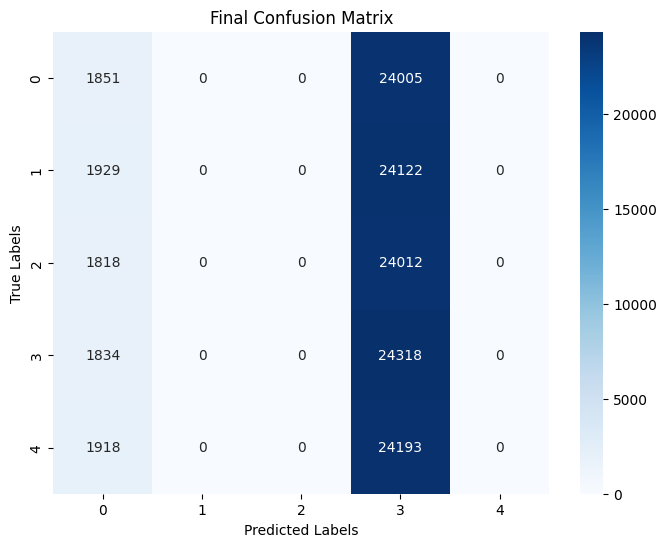

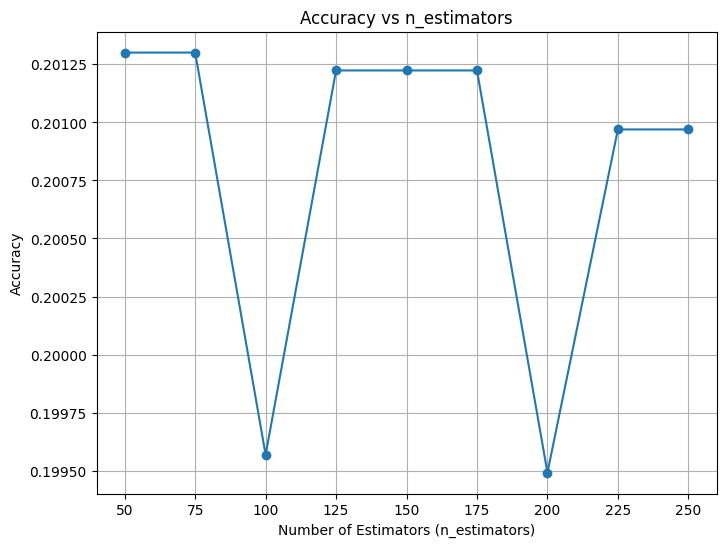

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your dataset (replace 'your_data.csv' with your actual file path)
df = pd.read_csv('C:/Users/abdulssekyanzi/EDA Dataset.csv/100.csv')

# Preprocessing (assuming a 'label' column exists or you can create one)
#Important Note: This code assumes you have a 'label' column in your dataset.
#The MIT-BIH Arrhythmia Database requires significant preprocessing to generate labels.
#You will need to implement a robust method for labeling the heartbeats according to arrhythmia types.
#This often involves using annotations provided with the original database.
#This example shows a placeholder.
#If your data is not labeled, this code will not produce meaningful results.

#Example of placeholder labelling (you will need to replace this with accurate labelling)
#This code will create a random label for demonstration purpose.
if 'label' not in df.columns:
    df['label'] = np.random.randint(0, 5, df.shape[0]) # Creates random labels. replace with real labels.

# Drop unnecessary columns (e.g., 'Unnamed: 0', 'time_ms' if not needed for features)
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
if 'time_ms' in df.columns:
    df = df.drop('time_ms', axis=1)

# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning (iterating to find better n_estimators)
best_accuracy = 0
best_n_estimators = 0
accuracies = []
n_estimators_range = range(50, 251, 25) # Test n_estimators from 50 to 250 with step 25

for n_estimators in n_estimators_range:
    weak_learner = DecisionTreeClassifier(max_depth=1)
    model = AdaBoostClassifier(estimator=weak_learner, n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f"Best Accuracy: {best_accuracy} with n_estimators: {best_n_estimators}")

# Train the final model with the best parameters
weak_learner = DecisionTreeClassifier(max_depth=1)
final_model = AdaBoostClassifier(estimator=weak_learner, n_estimators=best_n_estimators, random_state=42)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

# Evaluate the final model
report = classification_report(y_test, y_pred_final)
conf_matrix = confusion_matrix(y_test, y_pred_final)

print(f"Final Classification Report:\n{report}")
print(f"Final Confusion Matrix:\n{conf_matrix}")

#Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Final Confusion Matrix')
plt.show()

# Plotting Accuracy vs n_estimators
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_estimators')
plt.grid(True)
plt.show()